In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [309]:
weather_df = pd.read_csv('Updated 2022 jan to 2023 feb.csv')
weather_df.head(5)

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Surface_Pressure,Wind_speed
0,2022,1,21.95,17.12,27.66,13.24,0.0,94.21,2.05
1,2022,2,22.23,16.81,28.35,12.76,0.0,94.07,2.03
2,2022,3,21.78,16.42,28.05,12.15,0.0,94.03,1.85
3,2022,4,21.82,16.48,28.43,11.35,0.0,94.02,1.97
4,2022,5,20.19,13.77,27.81,10.56,0.0,94.02,1.30


In [310]:
weather_df.columns

Index(['YEAR', 'Date', 'Temperature', 'Min_Temperature', 'Max_Temperature',
       'Humidity', 'Precipitation', 'Surface_Pressure', 'Wind_speed'],
      dtype='object')

In [311]:
weather_df.describe()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Surface_Pressure,Wind_speed
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,2022.141176,161.470588,23.604918,18.712776,29.933059,13.437388,4.198659,93.650776,2.385082
std,0.348614,111.471778,2.833132,3.465071,4.360874,3.696649,8.802059,0.266535,1.153919
min,2022.000000,1.000000,17.080000,9.780000,23.010000,5.000000,0.000000,92.960000,0.550000
25%,2022.000000,54.000000,21.850000,15.570000,26.420000,10.440000,0.000000,93.460000,1.610000
50%,2022.000000,153.000000,23.200000,19.780000,28.260000,14.160000,0.110000,93.660000,2.050000
75%,2022.000000,259.000000,25.480000,21.580000,33.630000,16.910000,3.740000,93.850000,2.830000
max,2023.000000,365.000000,30.120000,24.760000,40.350000,18.490000,63.400000,94.310000,6.790000


In [312]:
weather_df.isnull().any()

YEAR                False
Date                False
Temperature         False
Min_Temperature     False
Max_Temperature     False
Humidity            False
Precipitation       False
Surface_Pressure    False
Wind_speed          False
dtype: bool

In [313]:
weather_df_num=weather_df.loc[:,['Temperature','Min_Temperature','Max_Temperature','Humidity','Precipitation']]
weather_df_num.head()

,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation
0,21.95,17.12,27.66,13.24,0.0
1,22.23,16.81,28.35,12.76,0.0
2,21.78,16.42,28.05,12.15,0.0
3,21.82,16.48,28.43,11.35,0.0
4,20.19,13.77,27.81,10.56,0.0


In [314]:
weather_df_num.shape

(425, 5)

In [315]:
weather_df_num.columns

Index(['Temperature', 'Min_Temperature', 'Max_Temperature', 'Humidity',
       'Precipitation'],
      dtype='object')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

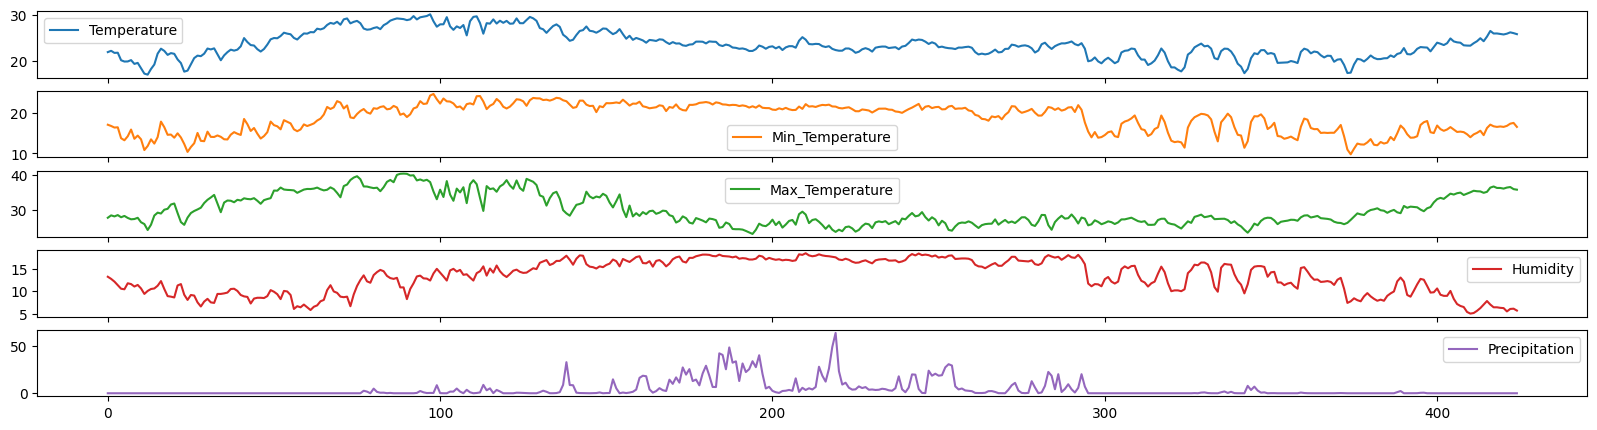

In [316]:
weather_df_num.plot(subplots=True, figsize=(20,5))

In [317]:
import seaborn as sns

<Axes: ylabel='Date'>

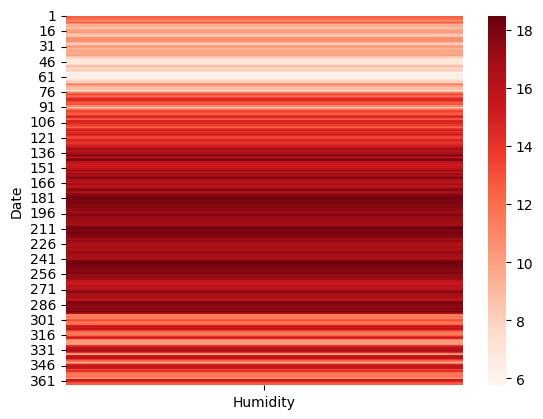

In [361]:
humidity_table = pd.pivot_table(weather_df, values='Humidity', index=['Date'])
sns.heatmap(data = humidity_table, cmap='Reds')

<Axes: ylabel='Date'>

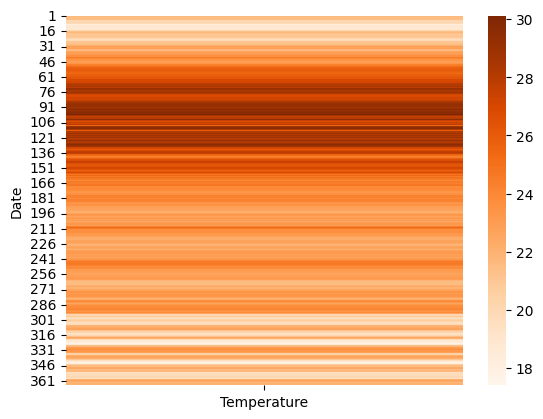

In [362]:
Temperature_table = pd.pivot_table(weather_df, values='Temperature', index=['Date'])
sns.heatmap(data= Temperature_table, cmap='Oranges')

<Axes: ylabel='Date'>

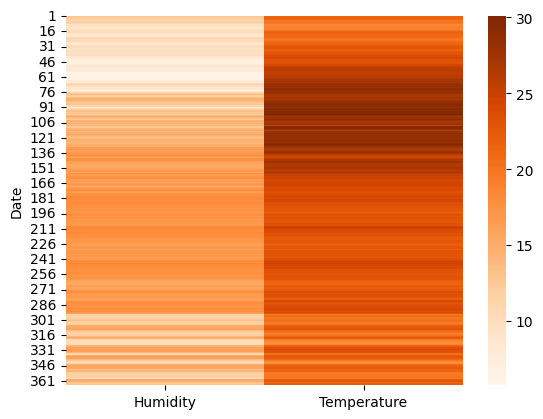

In [359]:
Weather_table = pd.pivot_table(weather_df, values=['Humidity','Temperature' ], index=['Date'])
sns.heatmap(data = Weather_table, cmap='Oranges')


**Train**

In [320]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [321]:
weather_y=weather_df_num.pop("Temperature")
weather_x=weather_df_num

In [322]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [323]:
train_X.shape

(340, 4)

In [324]:
train_X.head

<bound method NDFrame.head of      Min_Temperature  Max_Temperature  Humidity  Precipitation
312            15.80            26.68     11.96           0.00
350            16.62            27.61     14.22           0.13
251            20.93            26.80     17.70          18.98
244            22.29            28.30     18.43           4.44
139            22.11            28.26     17.03           8.66
..               ...              ...       ...            ...
360            18.65            28.30     15.38           0.27
385            12.68            29.09      8.97           0.00
197            21.33            25.42     17.76          20.35
174            20.65            27.55     16.42          19.60
122            22.44            36.00     14.59           0.00

[340 rows x 4 columns]>

In [325]:
train_y.shape

(340,)

In [326]:
train_y.head()

312    20.33
350    21.74
251    23.13
244    24.66
139    24.39
Name: Temperature, dtype: float64

**LINEAR REGRESSION**

In [327]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [328]:
prediction = model.predict(test_X)

In [329]:
#calculating error
np.mean(np.absolute(prediction-test_y))

0.28799783066773765

In [330]:

print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.99


In [331]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
68,28.07,27.76,0.31
186,23.58,23.71,-0.13
209,25.18,24.45,0.73
283,23.21,23.04,0.17
72,29.22,28.61,0.61
...,...,...,...
388,21.55,21.39,0.16
70,27.86,27.34,0.52
206,23.23,23.25,-0.02
45,22.58,22.94,-0.36


In [332]:
#Now look at the difference between predicted and actual
df=pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

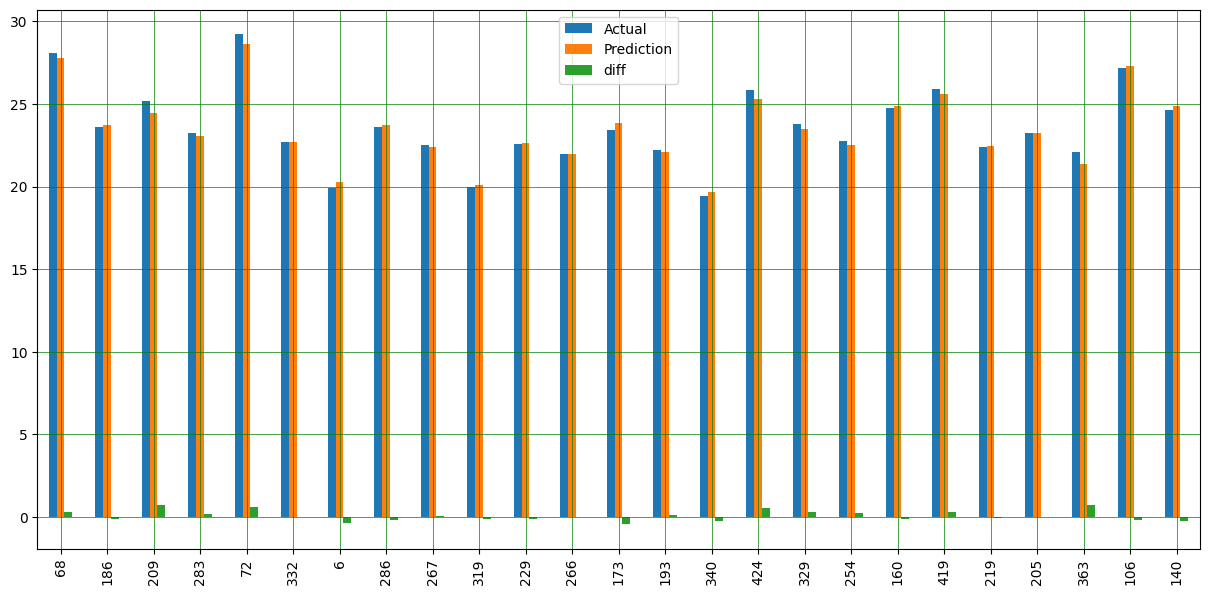

In [333]:
df1= df.head(25)
df1.plot(kind='bar', figsize=(15,7))
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()

**Descission Tree Regression**

In [334]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [335]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

0.42929411764705877

In [336]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.96


In [337]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
68,28.07,28.26,-0.19
186,23.58,23.69,-0.11
209,25.18,24.58,0.60
283,23.21,23.23,-0.02
72,29.22,28.70,0.52
...,...,...,...
388,21.55,21.62,-0.07
70,27.86,28.50,-0.64
206,23.23,23.23,0.00
45,22.58,21.73,0.85


In [338]:
#Now look at the difference between predicted and actual
df=pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

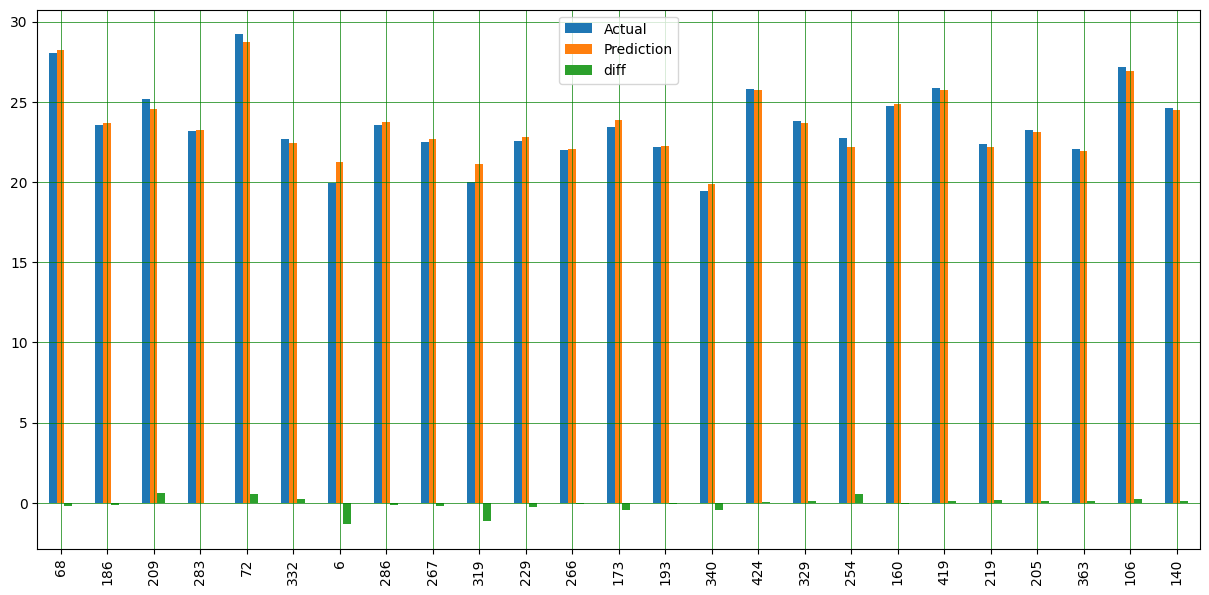

In [339]:
df1= df.head(25)
df1.plot(kind='bar', figsize=(15,7))
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()

Random Forest Regression

In [340]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [341]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

0.27060705882353087

In [342]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.98


In [343]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
68,28.07,27.80,0.27
186,23.58,23.71,-0.13
209,25.18,24.43,0.75
283,23.21,23.14,0.07
72,29.22,28.68,0.54
...,...,...,...
388,21.55,21.21,0.34
70,27.86,27.81,0.05
206,23.23,23.18,0.05
45,22.58,22.43,0.15


In [344]:
from sklearn.metrics import r2_score

**R-2 SCORE FOR LINEAR REGRESSION**

In [345]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 0.43
Residual sum of squares (MSE): 0.38
R2-score: 0.96


**R-2 SCORE FOR DESCISSION TREE REGRESSION**

In [346]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 0.27
Residual sum of squares (MSE): 0.15
R2-score: 0.98


**HEALTHY VEGETATION**

In [ ]:
is_healthy = []
for healthy_Vegetation, row in weather_df.iterrows():
    temperature = row['Temperature']
    humidity = row['Humidity']

    if temperature >= 21 and  humidity >= 10:
        is_healthy.append(True)
    else:
        is_healthy.append(False)

weather_df['is_healthy_vegetation'] = is_healthy

# Print the results'is_healthy'
print(weather_df)

**WITH NDVI VALUES**

In [ ]:
is_healthy_Vegetaion_ndvi = []
for healthy_Vegetation_Ndvi, row in data.iterrows():
    ndvi = row['ndvi']
    temperature = row['Temperature']
    humidity = row['Humidity']

    if ndvi >= 0.5 and temperature >= 21 and humidity >= 11:
        is_healthy.append(True)
    else:
        is_healthy.append(False)


weather_df['is_healthy_Vegetaion_Ndvi'] = is_healthy


print(weather_df)